In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv('data.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [55]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


# DATA PROCESSING

In [57]:
X = df.drop(columns= ['country']).values

In [58]:
## Scaling X so that features with large numbers dont dominate euclidian distance calculation

X_mean = np.mean(X, axis= 0)
X_std = np.std(X, axis= 0)

X_scaled = (X - X_mean)/X_std

# MODEL BUILDING

In [59]:
class KMeansClustering:
    def __init__(self, k):
        self.k = k
        self.centroids = None

    @staticmethod
    def euclidean_distance(data_point, centroids):
        return np.sqrt(np.sum((centroids - data_point)**2, axis= 1))
        
    def fit(self, X, max_iterations= 2000):
        indices = np.random.choice(X.shape[0], self.k, replace = False)
        self.centroids = X[indices]

        for _ in range(max_iterations):
            y = []

            for data_point in X:
                distances = KMeansClustering.euclidean_distance(data_point, self.centroids)
                cluster_num = np.argmin(distances)
                y.append(cluster_num)

            y = np.array(y)

            ## for each cluster, which all data points belong to that cluster
            cluster_indices = []

            for i in range(self.k):
                cluster_indices.append(np.where(y == i)[0])

            cluster_centres = []

            for i, indices in enumerate(cluster_indices):
                if len(indices) == 0:
                    cluster_centres.append(self.centroids[i])
                else:
                    cluster_centres.append(np.mean(X[indices], axis=0))

            ## Break condition
            if np.max(np.abs(self.centroids - np.array(cluster_centres))) < 0.0001:
                break
            else:
                self.centroids = np.array(cluster_centres)

                    #calculating within cluster sum of squares
        wcss = 0
        for i in range(self.k):
            points = X[y == i]
            wcss += np.sum((points - self.centroids[i]) ** 2)
            
        return y, self.centroids, wcss

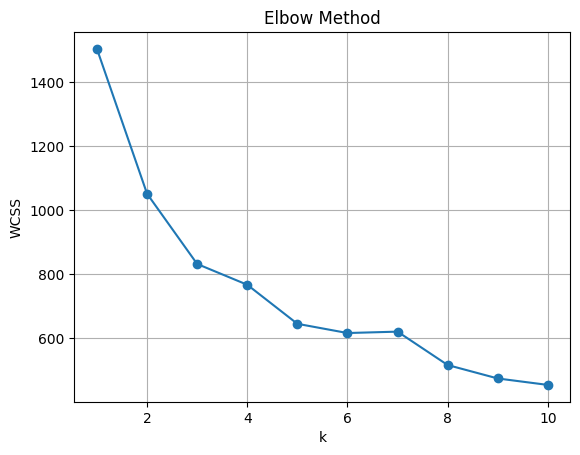

In [60]:
## calculating number of k
wcss_list = []

for k in range(1, 11):
    model = KMeansClustering(k=k)
    _, _, wcss = model.fit(X_scaled)
    wcss_list.append(wcss)

plt.plot(range(1, 11), wcss_list, marker='o')
plt.xlabel("k")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.grid(True)
plt.show()

In [80]:
Kmeans = KMeansClustering(k=5)
labels, centroids, _ = Kmeans.fit(X_scaled)

In [81]:
feature_names = df.drop(columns=['country']).columns
df2 = pd.DataFrame(X_scaled, columns=feature_names)

df2['Cluster'] = labels
df2

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,0
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,1
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,1
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,4
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,1
...,...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913,1
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323,1
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754,1
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754,4


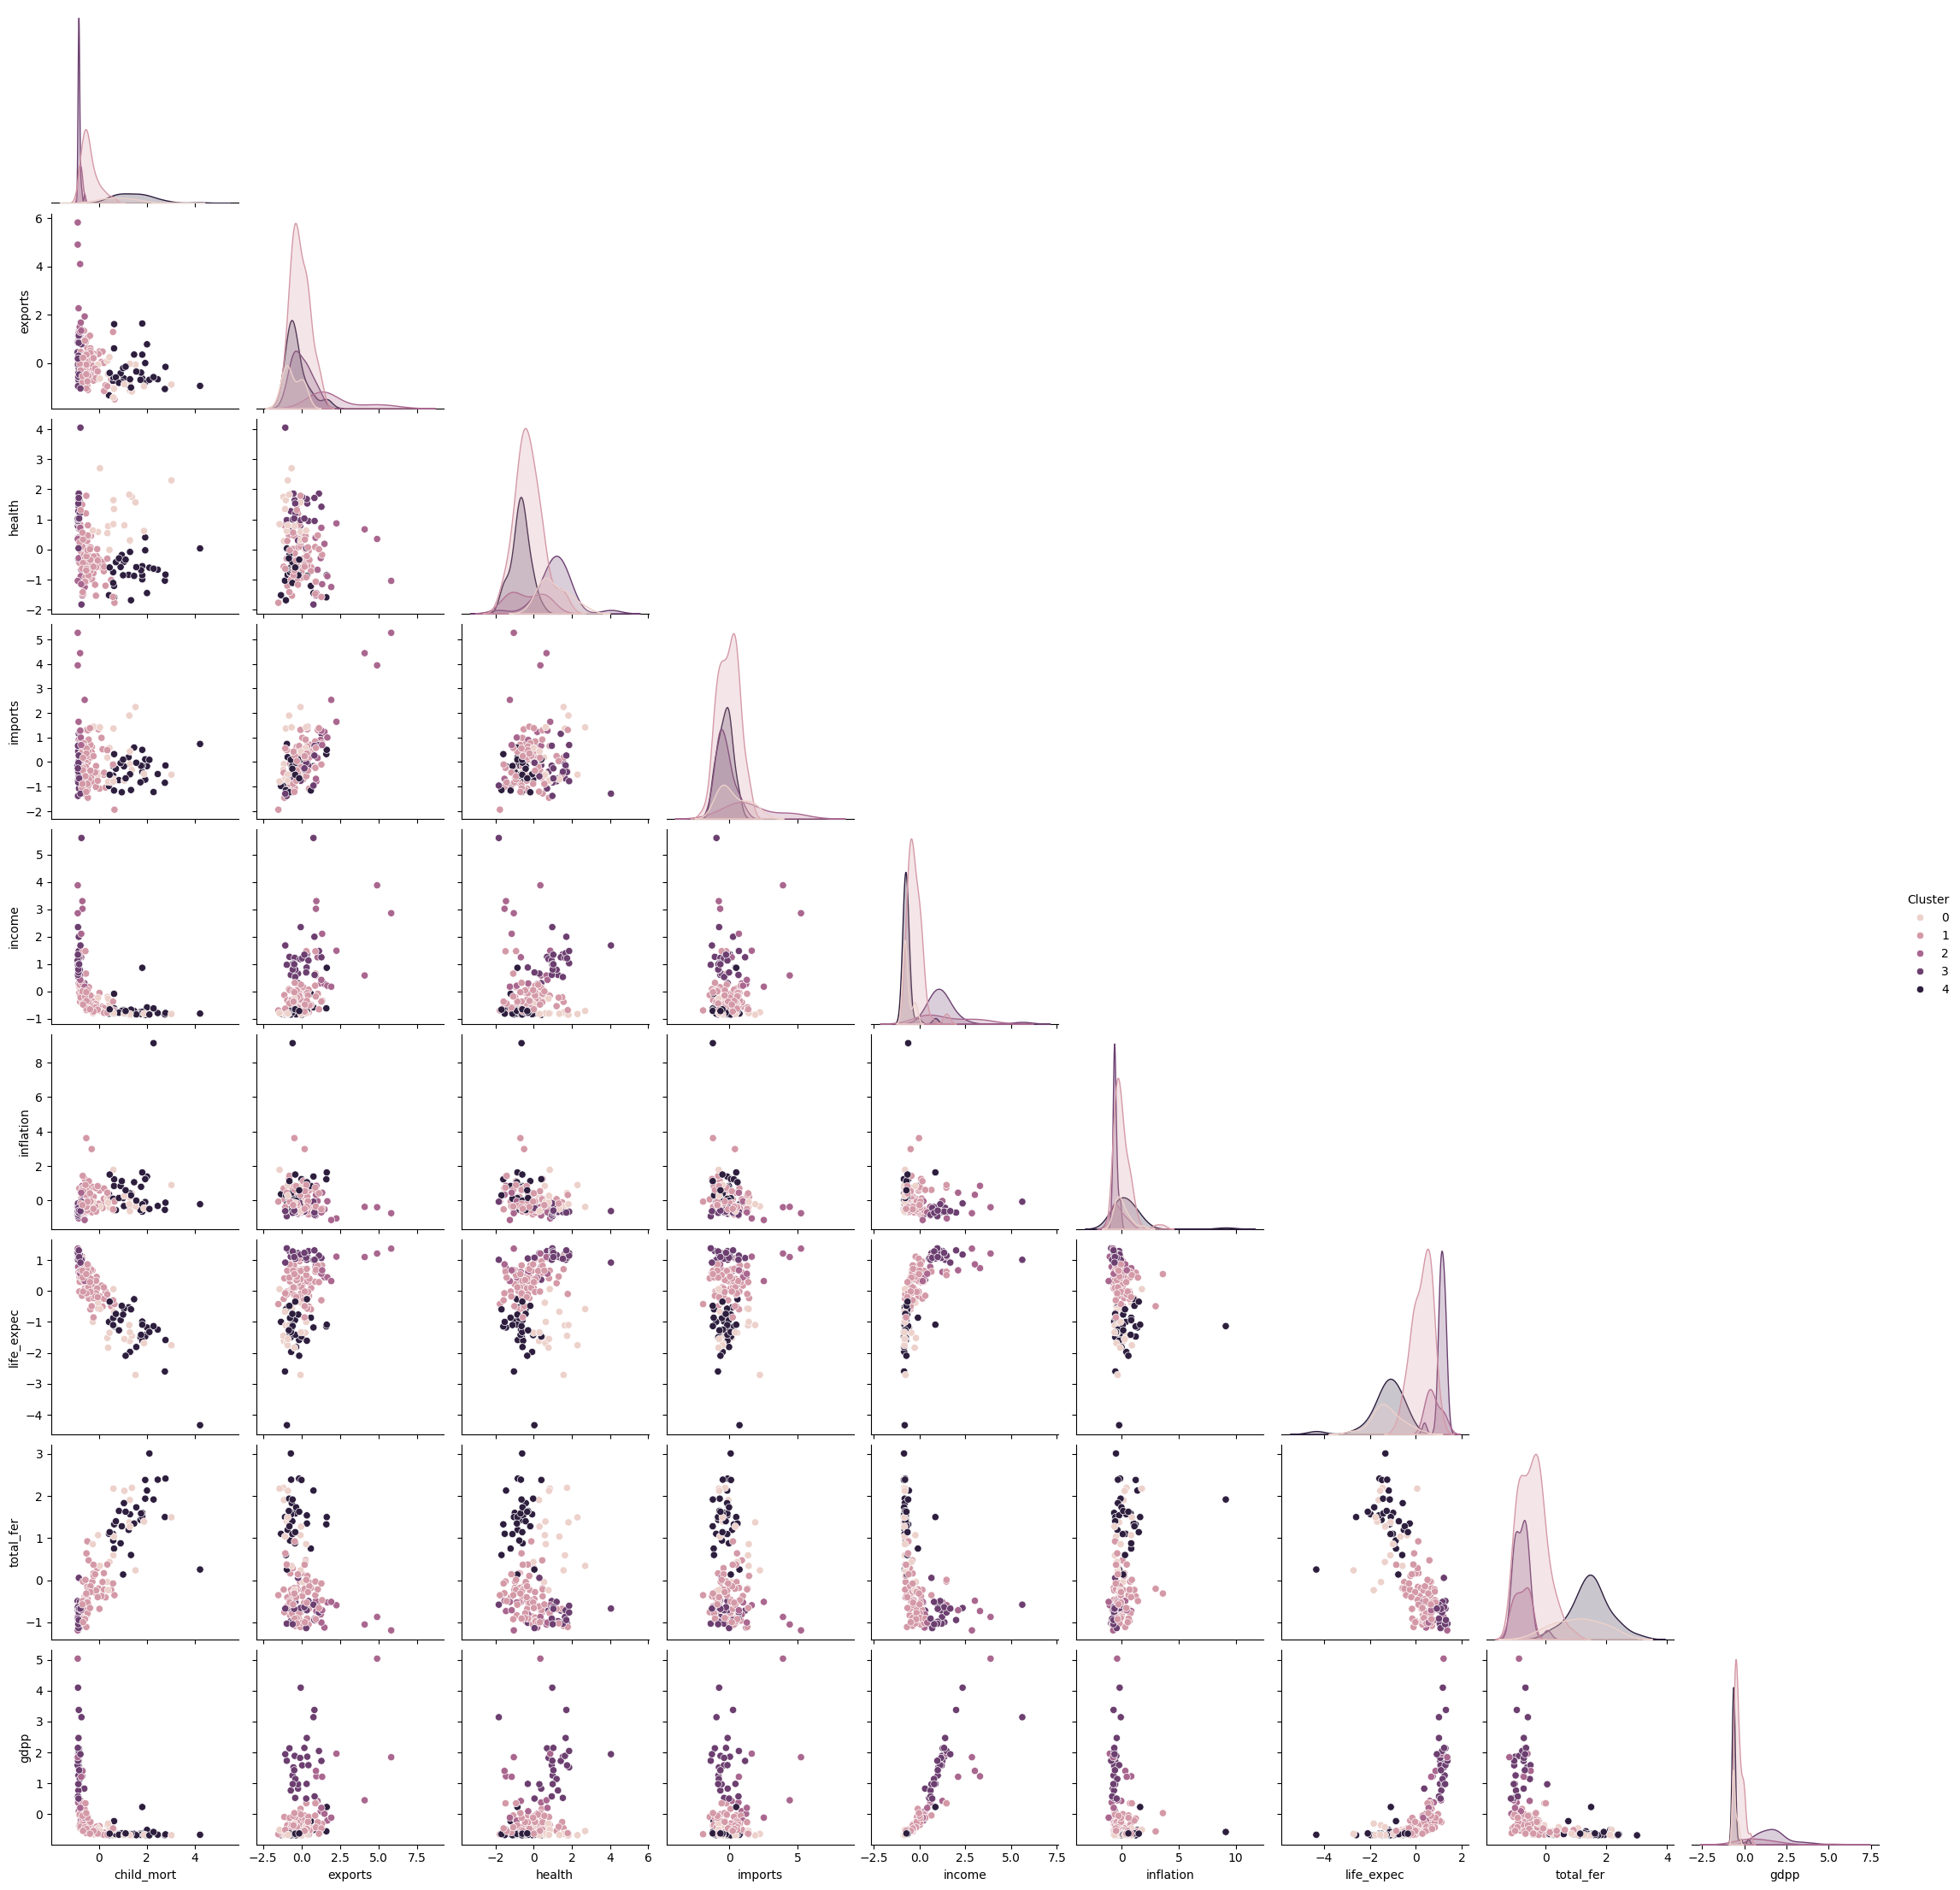

In [89]:
sns.pairplot(
    df2,
    hue='Cluster',
    diag_kind='kde',
    corner=True
)

plt.show()

In [90]:
df2.groupby('Cluster').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster,,,,,,,,,
0,0.912328,-0.587018,1.086284,0.267021,-0.685966,0.042915,-1.270125,1.070401,-0.588944
1,-0.393924,-0.109439,-0.264226,-0.082258,-0.270947,0.027021,0.269967,-0.430345,-0.378869
2,-0.777174,2.134441,-0.363315,1.591620,1.457816,-0.343870,0.774346,-0.793717,0.990382
3,-0.833620,-0.020250,1.090127,-0.366328,1.268710,-0.581320,1.119053,-0.781448,1.662916
4,1.506586,-0.341542,-0.702138,-0.331165,-0.691882,0.553113,-1.257831,1.473464,-0.611848


In [91]:
# Pairwise Euclidean distance matrix
dist_matrix = np.sqrt(
    np.sum((X_scaled[:, np.newaxis, :] - X_scaled[np.newaxis, :, :]) ** 2, axis=2)
)

silhouette_scores = []

for i in range(len(X_scaled)):
    same_cluster = labels == labels[i]
    other_clusters = labels != labels[i]

    # a(i): mean distance within same cluster
    a = np.mean(dist_matrix[i][same_cluster]) if np.sum(same_cluster) > 1 else 0

    # b(i): minimum mean distance to other clusters
    b = np.inf
    for c in np.unique(labels):
        if c != labels[i]:
            b = min(b, np.mean(dist_matrix[i][labels == c]))

    s = (b - a) / max(a, b)
    silhouette_scores.append(s)

silhouette_scores = np.array(silhouette_scores)
print("Mean Silhouette Score:", silhouette_scores.mean())

Mean Silhouette Score: 0.28007132450645716


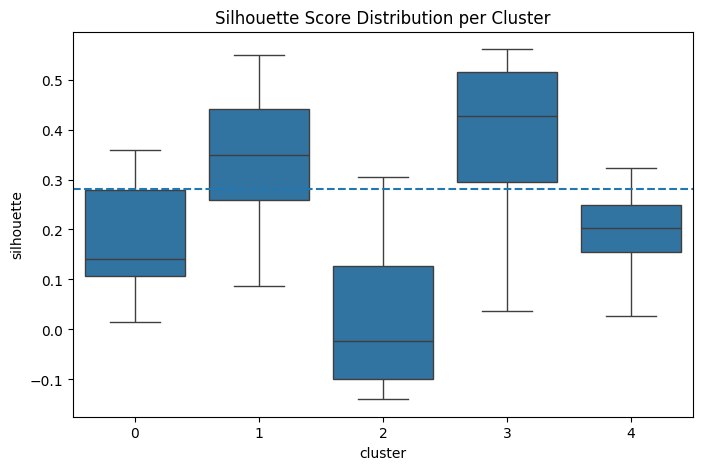

In [92]:
sil_df = pd.DataFrame({
    "silhouette": silhouette_scores,
    "cluster": labels
})

plt.figure(figsize=(8, 5))
sns.boxplot(x="cluster", y="silhouette", data=sil_df)
plt.axhline(silhouette_scores.mean(), linestyle='--')
plt.title("Silhouette Score Distribution per Cluster")
plt.show()

In [97]:
h = centroids.shape[0]

inter_dist = np.zeros((h, h))

for i in range(h):
    for j in range(h):
        inter_dist[i, j] = np.sqrt(np.sum((centroids[i] - centroids[j]) ** 2))

inter_dist_df = pd.DataFrame(inter_dist)
inter_dist_df

,0,1,2,3,4
0,0.000000,2.953133,5.386198,4.710576,2.095985
1,2.953133,0.000000,3.658009,3.141653,3.222797
2,5.386198,3.658009,0.000000,3.354900,5.693920
3,4.710576,3.141653,3.354900,0.000000,5.461946
4,2.095985,3.222797,5.693920,5.461946,0.000000


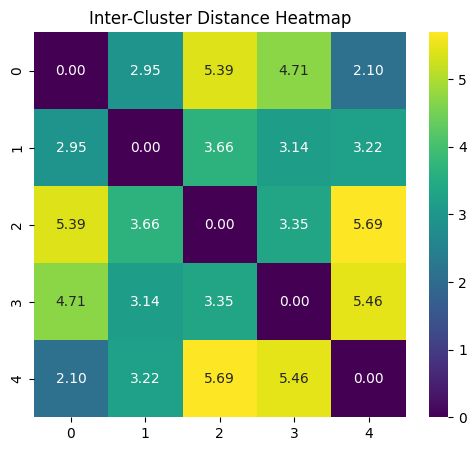

In [98]:
plt.figure(figsize=(6, 5))
sns.heatmap(inter_dist_df, annot=True, fmt=".2f", cmap="viridis")
plt.title("Inter-Cluster Distance Heatmap")
plt.show()

In [100]:
# Compute cluster scatter (Si)
cluster_scatter = {}

for c in np.unique(labels):
    points = X_scaled[labels == c]
    centroid = centroids[c]
    cluster_scatter[c] = np.mean(
        np.sqrt(np.sum((points - centroid) ** 2, axis=1))
    )

# Davies–Bouldin Index
db_values = []

for i in range(h):
    max_ratio = 0
    for j in range(h):
        if i != j:
            ratio = (cluster_scatter[i] + cluster_scatter[j]) / inter_dist[i, j]
            max_ratio = max(max_ratio, ratio)
    db_values.append(max_ratio)

db_index = np.mean(db_values)
print("Davies–Bouldin Index:", db_index)

Davies–Bouldin Index: 1.4907669198525977
